In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

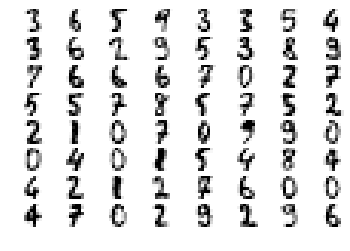

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 75)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.50036 stdev: 0.07049
Best fitness: 0.79839 - size: (2, 13) - species 6 - id 105
Average adjusted fitness: 0.170
Mean genetic distance 2.906, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.695 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53872 stdev: 0.07979
Best fitness: 0.80210 - size: (2, 12) - species 8 - id 385
Average adjusted fitness: 0.225
Mean genetic distance 2.973, standard deviation 0.462
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.581 sec (7.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56622 stdev: 0.08486
Best fitness: 0.81138 - size: (3, 15) - species 8 - id 516
Average adjusted fitness: 0.200
Mean genetic distance 2.970, standard deviation 0.477
Population of 204 members in 33 species
Total extinctio

Population's average fitness: 0.64377 stdev: 0.10218
Best fitness: 0.83426 - size: (4, 20) - species 33 - id 3249
Average adjusted fitness: 0.274
Mean genetic distance 3.283, standard deviation 0.490
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 8.335 sec (8.894 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64799 stdev: 0.09788
Best fitness: 0.83426 - size: (4, 20) - species 33 - id 3249
Average adjusted fitness: 0.206
Mean genetic distance 3.299, standard deviation 0.492
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.016 sec (8.930 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65295 stdev: 0.10044
Best fitness: 0.83426 - size: (4, 20) - species 33 - id 3249
Average adjusted fitness: 0.309
Mean genetic distance 3.289, standard deviation 0.491
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.295 sec (9.005 average)

 ******

Population's average fitness: 0.64938 stdev: 0.10391
Best fitness: 0.84725 - size: (7, 25) - species 29 - id 6300
Average adjusted fitness: 0.243
Mean genetic distance 3.267, standard deviation 0.569
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 10.317 sec (10.457 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64799 stdev: 0.10784
Best fitness: 0.84725 - size: (7, 25) - species 29 - id 6300
Average adjusted fitness: 0.276
Mean genetic distance 3.284, standard deviation 0.552
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 11.141 sec (10.652 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65269 stdev: 0.10692
Best fitness: 0.84725 - size: (7, 25) - species 29 - id 6300
Average adjusted fitness: 0.280
Mean genetic distance 3.229, standard deviation 0.554
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.043 sec (10.576 average)

 

Population's average fitness: 0.67879 stdev: 0.12923
Best fitness: 0.84972 - size: (8, 28) - species 29 - id 7431
Average adjusted fitness: 0.420
Mean genetic distance 3.159, standard deviation 0.548
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 11.107 sec (10.557 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67701 stdev: 0.12412
Best fitness: 0.84972 - size: (8, 28) - species 29 - id 7431
Average adjusted fitness: 0.285
Mean genetic distance 3.193, standard deviation 0.546
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.463 sec (10.569 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69113 stdev: 0.12333
Best fitness: 0.85096 - size: (14, 32) - species 58 - id 11090
Average adjusted fitness: 0.207
Mean genetic distance 3.183, standard deviation 0.549
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.959 sec (10.567 average)
n

Population's average fitness: 0.61210 stdev: 0.09271
Best fitness: 0.78912 - size: (4, 16) - species 38 - id 2546
Average adjusted fitness: 0.361
Mean genetic distance 3.237, standard deviation 0.468
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.525 sec (7.821 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61296 stdev: 0.08608
Best fitness: 0.78912 - size: (4, 16) - species 38 - id 2546
Average adjusted fitness: 0.234
Mean genetic distance 3.242, standard deviation 0.475
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.737 sec (7.777 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62195 stdev: 0.08509
Best fitness: 0.78912 - size: (4, 16) - species 38 - id 2546
Average adjusted fitness: 0.329
Mean genetic distance 3.250, standard deviation 0.467
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.909 sec (7.829 average)

 ******

Mean genetic distance 3.278, standard deviation 0.541
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.778 sec (8.669 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62650 stdev: 0.09180
Best fitness: 0.80519 - size: (6, 20) - species 57 - id 5436
Average adjusted fitness: 0.211
Mean genetic distance 3.258, standard deviation 0.535
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.398 sec (8.769 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.63672 stdev: 0.09030
Best fitness: 0.80519 - size: (6, 20) - species 57 - id 5436
Average adjusted fitness: 0.273
Mean genetic distance 3.238, standard deviation 0.542
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.802 sec (8.782 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62198 stdev: 0.09623
Best fitness: 0.80519 - size: (6, 20) - species 57 - id 5436


Mean genetic distance 3.083, standard deviation 0.556
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 10.037 sec (9.844 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.64408 stdev: 0.09193
Best fitness: 0.81509 - size: (7, 25) - species 47 - id 9415
Average adjusted fitness: 0.172
Mean genetic distance 3.084, standard deviation 0.553
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 9.285 sec (9.743 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.65044 stdev: 0.09703
Best fitness: 0.81509 - size: (7, 25) - species 47 - id 9415
Average adjusted fitness: 0.225
Mean genetic distance 3.062, standard deviation 0.553
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 10.545 sec (9.824 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.63760 stdev: 0.10087
Best fitness: 0.81509 - size: (7, 25) - species 47 - id 941

Mean genetic distance 3.252, standard deviation 0.475
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.633 sec (7.323 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62170 stdev: 0.07752
Best fitness: 0.78108 - size: (5, 18) - species 33 - id 1681
Average adjusted fitness: 0.204
Mean genetic distance 3.258, standard deviation 0.482
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.277 sec (7.560 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60728 stdev: 0.08545
Best fitness: 0.78108 - size: (5, 18) - species 33 - id 1681
Average adjusted fitness: 0.240
Mean genetic distance 3.279, standard deviation 0.493
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.114 sec (7.691 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61248 stdev: 0.08204
Best fitness: 0.78108 - size: (5, 18) - species 33 - id 1681


Generation time: 10.405 sec (9.997 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62554 stdev: 0.08700
Best fitness: 0.79592 - size: (7, 22) - species 33 - id 6197
Average adjusted fitness: 0.229
Mean genetic distance 3.286, standard deviation 0.555
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.594 sec (10.101 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62615 stdev: 0.08406
Best fitness: 0.79716 - size: (6, 19) - species 33 - id 6373
Average adjusted fitness: 0.180
Mean genetic distance 3.261, standard deviation 0.563
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.428 sec (10.151 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62232 stdev: 0.08217
Best fitness: 0.79716 - size: (6, 19) - species 33 - id 6373
Average adjusted fitness: 0.199
Mean genetic distance 3.274, standard deviation 0.541
Population of 199 member

Population's average fitness: 0.62623 stdev: 0.08669
Best fitness: 0.82066 - size: (9, 29) - species 8 - id 7490
Average adjusted fitness: 0.187
Mean genetic distance 3.164, standard deviation 0.585
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 9.845 sec (10.655 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62698 stdev: 0.08665
Best fitness: 0.82066 - size: (9, 29) - species 8 - id 7490
Average adjusted fitness: 0.173
Mean genetic distance 3.162, standard deviation 0.571
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.486 sec (10.684 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.64179 stdev: 0.09061
Best fitness: 0.82066 - size: (9, 29) - species 8 - id 7490
Average adjusted fitness: 0.182
Mean genetic distance 3.133, standard deviation 0.550
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.371 sec (10.663 average)

 ******

Population's average fitness: 0.68422 stdev: 0.13637
Best fitness: 0.86580 - size: (4, 17) - species 29 - id 1173
Average adjusted fitness: 0.373
Mean genetic distance 3.257, standard deviation 0.500
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 7.332 sec (8.600 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69416 stdev: 0.12878
Best fitness: 0.86580 - size: (4, 17) - species 29 - id 1173
Average adjusted fitness: 0.380
Mean genetic distance 3.268, standard deviation 0.497
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.253 sec (8.549 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68751 stdev: 0.13950
Best fitness: 0.86580 - size: (4, 17) - species 29 - id 1173
Average adjusted fitness: 0.393
Mean genetic distance 3.280, standard deviation 0.489
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.126 sec (8.499 average)

 ******

Population's average fitness: 0.69179 stdev: 0.14924
Best fitness: 0.87075 - size: (5, 19) - species 29 - id 3936
Average adjusted fitness: 0.426
Mean genetic distance 3.354, standard deviation 0.528
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 9.626 sec (9.650 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.69276 stdev: 0.14797
Best fitness: 0.87075 - size: (5, 19) - species 52 - id 3936
Average adjusted fitness: 0.392
Mean genetic distance 3.354, standard deviation 0.524
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 8.612 sec (9.593 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67865 stdev: 0.15132
Best fitness: 0.87075 - size: (5, 19) - species 52 - id 3936
Average adjusted fitness: 0.365
Mean genetic distance 3.345, standard deviation 0.532
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 8.573 sec (9.511 average)

 ******

Population's average fitness: 0.68101 stdev: 0.16548
Best fitness: 0.88497 - size: (8, 25) - species 62 - id 7527
Average adjusted fitness: 0.377
Mean genetic distance 3.305, standard deviation 0.621
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.803 sec (10.117 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66561 stdev: 0.16782
Best fitness: 0.88497 - size: (8, 25) - species 62 - id 7527
Average adjusted fitness: 0.348
Mean genetic distance 3.307, standard deviation 0.628
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.387 sec (10.270 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.68026 stdev: 0.17195
Best fitness: 0.88497 - size: (8, 25) - species 62 - id 7527
Average adjusted fitness: 0.379
Mean genetic distance 3.319, standard deviation 0.601
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.014 sec (10.564 average)

 *

Population's average fitness: 0.64480 stdev: 0.09603
Best fitness: 0.79777 - size: (2, 12) - species 19 - id 673
Average adjusted fitness: 0.278
Mean genetic distance 3.091, standard deviation 0.510
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.518 sec (7.512 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65187 stdev: 0.09877
Best fitness: 0.79777 - size: (2, 12) - species 19 - id 673
Average adjusted fitness: 0.323
Mean genetic distance 3.109, standard deviation 0.515
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.483 sec (7.608 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64305 stdev: 0.09660
Best fitness: 0.79777 - size: (2, 12) - species 19 - id 673
Average adjusted fitness: 0.227
Mean genetic distance 3.122, standard deviation 0.519
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.617 sec (7.641 average)

 ****** Ru

Population's average fitness: 0.65804 stdev: 0.10808
Best fitness: 0.81880 - size: (8, 23) - species 39 - id 5496
Average adjusted fitness: 0.322
Mean genetic distance 3.185, standard deviation 0.556
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 9.858 sec (9.535 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67369 stdev: 0.10358
Best fitness: 0.82251 - size: (9, 23) - species 39 - id 5708
Average adjusted fitness: 0.209
Mean genetic distance 3.204, standard deviation 0.534
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 11.518 sec (9.684 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66820 stdev: 0.10901
Best fitness: 0.82251 - size: (9, 23) - species 39 - id 5708
Average adjusted fitness: 0.303
Mean genetic distance 3.219, standard deviation 0.556
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 11.107 sec (9.886 average)

 ****

Population's average fitness: 0.67116 stdev: 0.11119
Best fitness: 0.85714 - size: (17, 44) - species 1 - id 8756
Average adjusted fitness: 0.317
Mean genetic distance 3.134, standard deviation 0.585
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.480 sec (11.714 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67882 stdev: 0.11157
Best fitness: 0.85714 - size: (17, 44) - species 1 - id 8756
Average adjusted fitness: 0.224
Mean genetic distance 3.131, standard deviation 0.578
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.233 sec (11.842 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68121 stdev: 0.11578
Best fitness: 0.85714 - size: (17, 44) - species 1 - id 8756
Average adjusted fitness: 0.355
Mean genetic distance 3.156, standard deviation 0.564
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 12.164 sec (11.867 average)

 

Population's average fitness: 0.60707 stdev: 0.08396
Best fitness: 0.79221 - size: (9, 27) - species 38 - id 1565
Average adjusted fitness: 0.223
Mean genetic distance 3.142, standard deviation 0.489
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 8.378 sec (7.064 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60231 stdev: 0.09169
Best fitness: 0.79221 - size: (9, 27) - species 38 - id 1565
Average adjusted fitness: 0.306
Mean genetic distance 3.141, standard deviation 0.485
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.648 sec (7.253 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61050 stdev: 0.08886
Best fitness: 0.79221 - size: (9, 27) - species 38 - id 1565
Average adjusted fitness: 0.207
Mean genetic distance 3.130, standard deviation 0.484
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 7.275 sec (7.381 average)

 ******

Population's average fitness: 0.64176 stdev: 0.09855
Best fitness: 0.80210 - size: (10, 30) - species 38 - id 4267
Average adjusted fitness: 0.270
Mean genetic distance 3.236, standard deviation 0.530
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.774 sec (8.614 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.63851 stdev: 0.09565
Best fitness: 0.80581 - size: (10, 28) - species 41 - id 4870
Average adjusted fitness: 0.292
Mean genetic distance 3.246, standard deviation 0.541
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 9.352 sec (8.569 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.64105 stdev: 0.10135
Best fitness: 0.80581 - size: (10, 28) - species 41 - id 4870
Average adjusted fitness: 0.265
Mean genetic distance 3.266, standard deviation 0.549
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 10.193 sec (8.805 average)

 **

Population's average fitness: 0.65976 stdev: 0.09717
Best fitness: 0.82251 - size: (11, 28) - species 41 - id 7513
Average adjusted fitness: 0.245
Mean genetic distance 3.291, standard deviation 0.548
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 13.204 sec (10.563 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.64853 stdev: 0.10528
Best fitness: 0.82251 - size: (11, 28) - species 48 - id 7513
Average adjusted fitness: 0.236
Mean genetic distance 3.284, standard deviation 0.573
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 12.554 sec (10.879 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.64453 stdev: 0.10216
Best fitness: 0.82251 - size: (11, 28) - species 48 - id 7513
Average adjusted fitness: 0.251
Mean genetic distance 3.323, standard deviation 0.588
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.681 sec (10.894 average)

Population's average fitness: 0.58976 stdev: 0.07398
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.171
Mean genetic distance 3.241, standard deviation 0.482
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.775 sec (7.099 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59833 stdev: 0.07215
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.207
Mean genetic distance 3.231, standard deviation 0.465
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.834 sec (7.070 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59611 stdev: 0.07319
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.170
Mean genetic distance 3.232, standard deviation 0.458
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 8.891 sec (7.252 average)

 ****** R

Population's average fitness: 0.62372 stdev: 0.08464
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.257
Mean genetic distance 3.231, standard deviation 0.496
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 11.163 sec (9.045 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61726 stdev: 0.08880
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.340
Mean genetic distance 3.256, standard deviation 0.497
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 10.554 sec (9.316 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61892 stdev: 0.08559
Best fitness: 0.76190 - size: (6, 19) - species 27 - id 1187
Average adjusted fitness: 0.199
Mean genetic distance 3.236, standard deviation 0.498
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 10.062 sec (9.465 average)

 ***

Population's average fitness: 0.63000 stdev: 0.08605
Best fitness: 0.77489 - size: (8, 24) - species 52 - id 7740
Average adjusted fitness: 0.280
Mean genetic distance 3.262, standard deviation 0.568
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 10.293 sec (10.237 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62570 stdev: 0.08368
Best fitness: 0.77489 - size: (8, 24) - species 52 - id 7740
Average adjusted fitness: 0.271
Mean genetic distance 3.307, standard deviation 0.566
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 9.610 sec (10.290 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63137 stdev: 0.08814
Best fitness: 0.77489 - size: (13, 31) - species 38 - id 8034
Average adjusted fitness: 0.240
Mean genetic distance 3.309, standard deviation 0.572
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 10.301 sec (10.414 average)

 

Population's average fitness: 0.55840 stdev: 0.06523
Best fitness: 0.73593 - size: (5, 18) - species 32 - id 754
Average adjusted fitness: 0.191
Mean genetic distance 3.109, standard deviation 0.478
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.561 sec (6.407 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56616 stdev: 0.06440
Best fitness: 0.73593 - size: (5, 18) - species 28 - id 754
Average adjusted fitness: 0.209
Mean genetic distance 3.095, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.354 sec (6.732 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57071 stdev: 0.06723
Best fitness: 0.74026 - size: (7, 27) - species 25 - id 1083
Average adjusted fitness: 0.173
Mean genetic distance 3.107, standard deviation 0.493
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.548 sec (6.848 average)

 ****** Run

Population's average fitness: 0.61937 stdev: 0.07742
Best fitness: 0.76994 - size: (8, 25) - species 22 - id 3549
Average adjusted fitness: 0.196
Mean genetic distance 3.212, standard deviation 0.527
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 8.479 sec (8.486 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61031 stdev: 0.08710
Best fitness: 0.77922 - size: (8, 26) - species 22 - id 4140
Average adjusted fitness: 0.193
Mean genetic distance 3.194, standard deviation 0.538
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.720 sec (8.558 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62219 stdev: 0.08131
Best fitness: 0.77922 - size: (8, 26) - species 22 - id 4140
Average adjusted fitness: 0.249
Mean genetic distance 3.211, standard deviation 0.519
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 10.193 sec (8.691 average)

 *****

Population's average fitness: 0.61920 stdev: 0.08786
Best fitness: 0.78231 - size: (8, 26) - species 22 - id 5999
Average adjusted fitness: 0.216
Mean genetic distance 3.286, standard deviation 0.596
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 11.391 sec (11.369 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.62062 stdev: 0.08434
Best fitness: 0.78231 - size: (8, 26) - species 22 - id 5999
Average adjusted fitness: 0.221
Mean genetic distance 3.316, standard deviation 0.574
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 11.482 sec (11.436 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.62424 stdev: 0.08489
Best fitness: 0.78231 - size: (8, 26) - species 22 - id 5999
Average adjusted fitness: 0.152
Mean genetic distance 3.288, standard deviation 0.582
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.029 sec (11.647 average)

 

Population's average fitness: 0.53250 stdev: 0.06648
Best fitness: 0.71243 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.193
Mean genetic distance 2.994, standard deviation 0.481
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 6.285 sec (5.969 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55459 stdev: 0.06493
Best fitness: 0.71243 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.167
Mean genetic distance 3.054, standard deviation 0.497
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.962 sec (5.966 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56278 stdev: 0.06795
Best fitness: 0.73098 - size: (4, 16) - species 2 - id 699
Average adjusted fitness: 0.168
Mean genetic distance 3.064, standard deviation 0.516
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.542 sec (6.110 average)

 ****** Running g

Population's average fitness: 0.61954 stdev: 0.08045
Best fitness: 0.75448 - size: (8, 23) - species 5 - id 3467
Average adjusted fitness: 0.225
Mean genetic distance 3.155, standard deviation 0.513
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.234 sec (8.047 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61930 stdev: 0.07674
Best fitness: 0.75448 - size: (8, 23) - species 5 - id 3467
Average adjusted fitness: 0.190
Mean genetic distance 3.145, standard deviation 0.518
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 11.257 sec (8.311 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62042 stdev: 0.08169
Best fitness: 0.75448 - size: (8, 23) - species 5 - id 3467
Average adjusted fitness: 0.240
Mean genetic distance 3.150, standard deviation 0.515
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.213 sec (8.397 average)

 ****** R

Population's average fitness: 0.62533 stdev: 0.09128
Best fitness: 0.77489 - size: (6, 23) - species 37 - id 7341
Average adjusted fitness: 0.237
Mean genetic distance 3.256, standard deviation 0.555
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.603 sec (10.524 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61451 stdev: 0.09782
Best fitness: 0.77489 - size: (6, 23) - species 37 - id 7341
Average adjusted fitness: 0.232
Mean genetic distance 3.252, standard deviation 0.560
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 11.570 sec (10.512 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.61319 stdev: 0.09407
Best fitness: 0.77489 - size: (6, 23) - species 37 - id 7341
Average adjusted fitness: 0.240
Mean genetic distance 3.277, standard deviation 0.552
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 9.016 sec (10.265 average)

 *

Population's average fitness: 0.62578 stdev: 0.09701
Best fitness: 0.78602 - size: (12, 31) - species 26 - id 8945
Average adjusted fitness: 0.206
Mean genetic distance 3.217, standard deviation 0.556
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.113 sec (9.766 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63663 stdev: 0.09355
Best fitness: 0.78602 - size: (12, 31) - species 26 - id 8945
Average adjusted fitness: 0.219
Mean genetic distance 3.212, standard deviation 0.555
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 10.246 sec (9.835 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49658 stdev: 0.06672
Best fitness: 0.74273 - size: (2, 13) - species 6 - id 113
Average adjusted fitness: 0.174
Mean genetic distance 2.930, standard deviation 0.453
Population of 201 members in 30 species
Total extinctions: 0
Generati

Population's average fitness: 0.65673 stdev: 0.09625
Best fitness: 0.79468 - size: (6, 22) - species 17 - id 2163
Average adjusted fitness: 0.222
Mean genetic distance 3.300, standard deviation 0.458
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.651 sec (7.902 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65163 stdev: 0.09582
Best fitness: 0.79468 - size: (6, 22) - species 17 - id 2163
Average adjusted fitness: 0.240
Mean genetic distance 3.296, standard deviation 0.464
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.069 sec (7.978 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66211 stdev: 0.09329
Best fitness: 0.79468 - size: (6, 22) - species 17 - id 2163
Average adjusted fitness: 0.225
Mean genetic distance 3.301, standard deviation 0.466
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.113 sec (8.041 average)

 ******

Population's average fitness: 0.67595 stdev: 0.10931
Best fitness: 0.82622 - size: (9, 28) - species 58 - id 5615
Average adjusted fitness: 0.340
Mean genetic distance 3.405, standard deviation 0.534
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.856 sec (9.516 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.67565 stdev: 0.11165
Best fitness: 0.82622 - size: (9, 28) - species 58 - id 5615
Average adjusted fitness: 0.288
Mean genetic distance 3.410, standard deviation 0.544
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 10.835 sec (9.673 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.66193 stdev: 0.11371
Best fitness: 0.82622 - size: (9, 28) - species 58 - id 5615
Average adjusted fitness: 0.265
Mean genetic distance 3.399, standard deviation 0.546
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 10.424 sec (9.815 average)

 ****

Population's average fitness: 0.65699 stdev: 0.11126
Best fitness: 0.83241 - size: (10, 29) - species 58 - id 9796
Average adjusted fitness: 0.272
Mean genetic distance 3.310, standard deviation 0.604
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 9.944 sec (9.773 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.65377 stdev: 0.10892
Best fitness: 0.83241 - size: (10, 29) - species 58 - id 9796
Average adjusted fitness: 0.262
Mean genetic distance 3.325, standard deviation 0.606
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.661 sec (9.793 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.64653 stdev: 0.11676
Best fitness: 0.83859 - size: (11, 29) - species 58 - id 10138
Average adjusted fitness: 0.291
Mean genetic distance 3.335, standard deviation 0.593
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.736 sec (9.800 average)

 **

Mean genetic distance 3.171, standard deviation 0.516
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.418 sec (7.706 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61335 stdev: 0.07554
Best fitness: 0.75696 - size: (4, 16) - species 22 - id 2818
Average adjusted fitness: 0.251
Mean genetic distance 3.206, standard deviation 0.508
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.688 sec (7.662 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61887 stdev: 0.07848
Best fitness: 0.75696 - size: (4, 16) - species 22 - id 2818
Average adjusted fitness: 0.250
Mean genetic distance 3.219, standard deviation 0.498
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 7.412 sec (7.542 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61341 stdev: 0.08252
Best fitness: 0.76562 - size: (5, 21) - species 33 - id 3208


Total extinctions: 0
Generation time: 8.462 sec (7.956 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62918 stdev: 0.08017
Best fitness: 0.80210 - size: (6, 24) - species 33 - id 5898
Average adjusted fitness: 0.177
Mean genetic distance 3.243, standard deviation 0.559
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 7.685 sec (7.957 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.61942 stdev: 0.08429
Best fitness: 0.80210 - size: (6, 24) - species 33 - id 5898
Average adjusted fitness: 0.191
Mean genetic distance 3.206, standard deviation 0.542
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 8.629 sec (8.060 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62942 stdev: 0.08434
Best fitness: 0.80210 - size: (6, 24) - species 33 - id 5898
Average adjusted fitness: 0.271
Mean genetic distance 3.228, standard deviation 0.572
Populati

Population's average fitness: 0.63936 stdev: 0.08980
Best fitness: 0.82560 - size: (8, 28) - species 33 - id 10136
Average adjusted fitness: 0.167
Mean genetic distance 3.264, standard deviation 0.605
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.557 sec (9.143 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63405 stdev: 0.09190
Best fitness: 0.82560 - size: (8, 28) - species 33 - id 10136
Average adjusted fitness: 0.260
Mean genetic distance 3.256, standard deviation 0.573
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 10.487 sec (9.287 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.62878 stdev: 0.08846
Best fitness: 0.82560 - size: (8, 28) - species 33 - id 10136
Average adjusted fitness: 0.162
Mean genetic distance 3.246, standard deviation 0.586
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 10.920 sec (9.490 average)

 *

Population's average fitness: 0.69162 stdev: 0.12293
Best fitness: 0.84910 - size: (4, 16) - species 39 - id 802
Average adjusted fitness: 0.422
Mean genetic distance 3.235, standard deviation 0.464
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 6.879 sec (6.884 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69067 stdev: 0.11838
Best fitness: 0.84910 - size: (4, 16) - species 39 - id 802
Average adjusted fitness: 0.428
Mean genetic distance 3.254, standard deviation 0.475
Population of 189 members in 39 species
Total extinctions: 0
Generation time: 6.981 sec (6.900 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68692 stdev: 0.12826
Best fitness: 0.84910 - size: (4, 16) - species 39 - id 802
Average adjusted fitness: 0.393
Mean genetic distance 3.268, standard deviation 0.468
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.621 sec (6.883 average)

 ****** Ru

Population's average fitness: 0.69525 stdev: 0.13281
Best fitness: 0.85838 - size: (6, 22) - species 40 - id 4070
Average adjusted fitness: 0.409
Mean genetic distance 3.339, standard deviation 0.547
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 8.417 sec (9.093 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.69950 stdev: 0.13501
Best fitness: 0.85838 - size: (6, 22) - species 40 - id 4070
Average adjusted fitness: 0.470
Mean genetic distance 3.307, standard deviation 0.548
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.184 sec (9.037 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69031 stdev: 0.13827
Best fitness: 0.85838 - size: (6, 22) - species 40 - id 4070
Average adjusted fitness: 0.392
Mean genetic distance 3.312, standard deviation 0.559
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.959 sec (9.188 average)

 *****

Population's average fitness: 0.71314 stdev: 0.13367
Best fitness: 0.86271 - size: (7, 24) - species 40 - id 7989
Average adjusted fitness: 0.452
Mean genetic distance 3.338, standard deviation 0.587
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 10.298 sec (10.427 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.70914 stdev: 0.14226
Best fitness: 0.86271 - size: (7, 24) - species 40 - id 7989
Average adjusted fitness: 0.423
Mean genetic distance 3.367, standard deviation 0.575
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.052 sec (10.579 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.70635 stdev: 0.13305
Best fitness: 0.86271 - size: (7, 24) - species 40 - id 7989
Average adjusted fitness: 0.420
Mean genetic distance 3.357, standard deviation 0.588
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.625 sec (10.801 average)

 

Population's average fitness: 0.68317 stdev: 0.11906
Best fitness: 0.82498 - size: (5, 19) - species 32 - id 1559
Average adjusted fitness: 0.389
Mean genetic distance 3.154, standard deviation 0.475
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 7.055 sec (7.627 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68632 stdev: 0.11748
Best fitness: 0.82498 - size: (5, 19) - species 32 - id 1559
Average adjusted fitness: 0.395
Mean genetic distance 3.157, standard deviation 0.486
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 7.250 sec (7.705 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.69023 stdev: 0.11031
Best fitness: 0.82498 - size: (5, 19) - species 32 - id 1559
Average adjusted fitness: 0.382
Mean genetic distance 3.156, standard deviation 0.492
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.255 sec (7.674 average)

 ******

Population's average fitness: 0.71672 stdev: 0.10319
Best fitness: 0.88806 - size: (8, 25) - species 28 - id 5147
Average adjusted fitness: 0.437
Mean genetic distance 3.303, standard deviation 0.528
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 8.759 sec (9.187 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.71283 stdev: 0.10851
Best fitness: 0.88806 - size: (8, 25) - species 28 - id 5147
Average adjusted fitness: 0.417
Mean genetic distance 3.291, standard deviation 0.527
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 8.415 sec (9.182 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70438 stdev: 0.11661
Best fitness: 0.88806 - size: (8, 25) - species 28 - id 5147
Average adjusted fitness: 0.384
Mean genetic distance 3.290, standard deviation 0.536
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 9.142 sec (9.089 average)

 ******

Total extinctions: 0
Generation time: 11.691 sec (9.608 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.69973 stdev: 0.12807
Best fitness: 0.88806 - size: (8, 25) - species 28 - id 5147
Average adjusted fitness: 0.422
Mean genetic distance 3.357, standard deviation 0.636
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 11.139 sec (9.808 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.69770 stdev: 0.12948
Best fitness: 0.88806 - size: (8, 25) - species 28 - id 5147
Average adjusted fitness: 0.393
Mean genetic distance 3.381, standard deviation 0.614
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 9.698 sec (9.859 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.69852 stdev: 0.13401
Best fitness: 0.89054 - size: (8, 26) - species 28 - id 9510
Average adjusted fitness: 0.390
Mean genetic distance 3.334, standard deviation 0.623
Popula

Population's average fitness: 0.67431 stdev: 0.10572
Best fitness: 0.78973 - size: (4, 18) - species 19 - id 780
Average adjusted fitness: 0.377
Mean genetic distance 3.135, standard deviation 0.475
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.713 sec (7.961 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66400 stdev: 0.11425
Best fitness: 0.78973 - size: (4, 18) - species 19 - id 780
Average adjusted fitness: 0.359
Mean genetic distance 3.152, standard deviation 0.477
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.043 sec (7.987 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67675 stdev: 0.09713
Best fitness: 0.78973 - size: (4, 18) - species 19 - id 780
Average adjusted fitness: 0.378
Mean genetic distance 3.136, standard deviation 0.475
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.118 sec (7.917 average)

 ****** Ru

Population's average fitness: 0.67762 stdev: 0.10956
Best fitness: 0.80458 - size: (4, 18) - species 19 - id 4726
Average adjusted fitness: 0.376
Mean genetic distance 3.195, standard deviation 0.514
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.053 sec (8.212 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.68258 stdev: 0.09910
Best fitness: 0.80458 - size: (4, 18) - species 19 - id 4726
Average adjusted fitness: 0.383
Mean genetic distance 3.191, standard deviation 0.519
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.268 sec (8.171 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.68118 stdev: 0.10299
Best fitness: 0.80458 - size: (4, 18) - species 19 - id 4726
Average adjusted fitness: 0.385
Mean genetic distance 3.197, standard deviation 0.515
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 10.303 sec (8.391 average)

 *****

Population's average fitness: 0.67323 stdev: 0.11419
Best fitness: 0.82870 - size: (12, 33) - species 18 - id 7899
Average adjusted fitness: 0.376
Mean genetic distance 3.193, standard deviation 0.604
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 9.999 sec (9.865 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.67679 stdev: 0.11121
Best fitness: 0.82870 - size: (12, 33) - species 18 - id 7899
Average adjusted fitness: 0.380
Mean genetic distance 3.167, standard deviation 0.597
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 9.987 sec (9.953 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66742 stdev: 0.11851
Best fitness: 0.82870 - size: (12, 33) - species 18 - id 7899
Average adjusted fitness: 0.369
Mean genetic distance 3.132, standard deviation 0.581
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 10.150 sec (9.979 average)

 **

Population's average fitness: 0.76612 stdev: 0.22048
Best fitness: 0.93692 - size: (3, 13) - species 35 - id 651
Average adjusted fitness: 0.633
Mean genetic distance 3.008, standard deviation 0.472
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 6.738 sec (6.484 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77271 stdev: 0.21681
Best fitness: 0.93692 - size: (3, 13) - species 35 - id 651
Average adjusted fitness: 0.648
Mean genetic distance 3.002, standard deviation 0.466
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.651 sec (6.554 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.78455 stdev: 0.21257
Best fitness: 0.93692 - size: (3, 13) - species 35 - id 651
Average adjusted fitness: 0.651
Mean genetic distance 2.999, standard deviation 0.472
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.718 sec (6.586 average)

 ****** Ru

Population's average fitness: 0.77826 stdev: 0.21432
Best fitness: 0.94063 - size: (8, 30) - species 42 - id 4013
Average adjusted fitness: 0.693
Mean genetic distance 3.184, standard deviation 0.542
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 9.556 sec (9.268 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76580 stdev: 0.23800
Best fitness: 0.94063 - size: (5, 18) - species 35 - id 4917
Average adjusted fitness: 0.659
Mean genetic distance 3.161, standard deviation 0.557
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 9.644 sec (9.362 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76178 stdev: 0.22914
Best fitness: 0.94063 - size: (5, 18) - species 35 - id 4917
Average adjusted fitness: 0.652
Mean genetic distance 3.166, standard deviation 0.526
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.993 sec (9.145 average)

 ******

Population's average fitness: 0.76662 stdev: 0.23398
Best fitness: 0.94682 - size: (10, 29) - species 9 - id 6000
Average adjusted fitness: 0.663
Mean genetic distance 3.334, standard deviation 0.537
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 9.595 sec (9.635 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.78877 stdev: 0.21901
Best fitness: 0.94682 - size: (10, 29) - species 9 - id 6000
Average adjusted fitness: 0.695
Mean genetic distance 3.314, standard deviation 0.558
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 9.607 sec (9.645 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.79712 stdev: 0.21622
Best fitness: 0.94682 - size: (10, 29) - species 9 - id 6000
Average adjusted fitness: 0.696
Mean genetic distance 3.312, standard deviation 0.570
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 9.778 sec (9.654 average)

 ******

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.8111111111111111
class1:89/91:class2
Accuracy: 0.8111111111111111
class1:93/87:class2
Accuracy: 0.7388888888888889
class1:126/54:class2
Accuracy: 0.8888888888888888
class1:94/86:class2
Accuracy: 0.8666666666666667
class1:91/89:class2
Accuracy: 0.8
class1:90/90:class2
Accuracy: 0.7666666666666667
class1:92/88:class2
Accuracy: 0.6944444444444444
class1:88/92:class2
Accuracy: 0.7055555555555556
class1:89/91:class2
Accuracy: 0.8
class1:93/87:class2
Accuracy: 0.7555555555555555
class1:53/127:class2
Accuracy: 0.8222222222222222
class1:51/129:class2
Accuracy: 0.8388888888888889
class1:54/126:class2
Accuracy: 0.7944444444444444
class1:161/19:class2
Accuracy: 0.9111111111111111


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.6944444444444444

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  0  0  0  0  1  0  0]
 [ 0  9  0  5  0  3  4  0  0  0]
 [ 0  4 15  1  0  0  0  0  1  0]
 [ 1  0  0  7  0  0  0  0  0  0]
 [ 1  0  2  0 16  4  2  2  0  0]
 [ 0  1  0  1  0  9  0  0  1  1]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  1  3  0  0 16  1  2]
 [ 0  5  0  3  0  1  0  0 14  1]
 [ 0  0  0  0  1  1  1  0  0 14]]


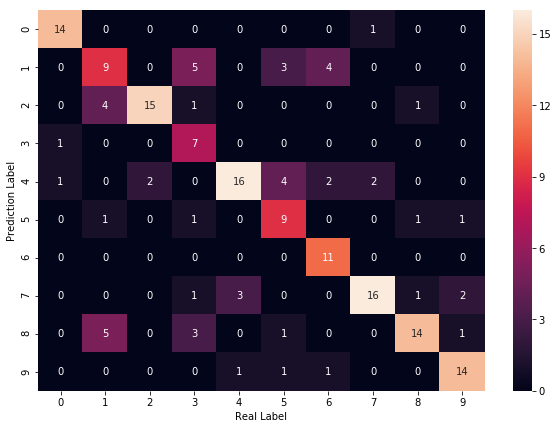

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([15., 21., 21.,  8., 27., 13., 11., 23., 24., 17.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:1 index:[1] real:5
#1 min_error:4 index:[2 4] real:2
#2 min_error:3 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:3 index:[1] real:1
#5 min_error:2 index:[7] real:7
#6 min_error:3 index:[9] real:6
#7 min_error:2 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:2 index:[0] real:7
#11 min_error:4 index:[7] real:4
#12 min_error:3 index:[1] real:6
#13 min_error:3 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:3 index:[3] real:3
#16 min_error:4 index:[7] real:9
#17 min_error:1 index:[1] real:1
#18 min_error:3 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:2 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:3 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:4 index:[0 3] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:3 index:[1] real:3
#28 min_error:3 index:[1] real:6
#29 min_error:2 index:[9] real:9
#30 min_error:3 

### part 2. add more classifier

real1 ->4

In [24]:
winner_list_append = []
classes = [[1,3,8,9],[0,1,3,5,7],[0,1,5,6,7],[0,4,7,9],[1,2,6,7,8]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list_append.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51650 stdev: 0.09176
Best fitness: 0.68707 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.246
Mean genetic distance 2.939, standard deviation 0.471
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.795 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55126 stdev: 0.09131
Best fitness: 0.73346 - size: (3, 14) - species 3 - id 366
Average adjusted fitness: 0.208
Mean genetic distance 2.940, standard deviation 0.469
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.361 sec (6.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57661 stdev: 0.08504
Best fitness: 0.75943 - size: (4, 17) - species 24 - id 422
Average adjusted fitness: 0.223
Mean genetic distance 2.923, standard deviation 0.473
Population of 206 members in 34 species
Total extinctio

Mean genetic distance 3.182, standard deviation 0.530
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.923 sec (8.113 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64486 stdev: 0.09916
Best fitness: 0.78602 - size: (5, 20) - species 18 - id 1334
Average adjusted fitness: 0.269
Mean genetic distance 3.220, standard deviation 0.530
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.260 sec (8.173 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64583 stdev: 0.09932
Best fitness: 0.78602 - size: (5, 20) - species 18 - id 1334
Average adjusted fitness: 0.254
Mean genetic distance 3.207, standard deviation 0.530
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.729 sec (8.258 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65280 stdev: 0.08972
Best fitness: 0.78602 - size: (4, 20) - species 7 - id 3756
A

Mean genetic distance 3.233, standard deviation 0.619
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 10.310 sec (11.197 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66100 stdev: 0.08861
Best fitness: 0.84292 - size: (10, 29) - species 38 - id 6295
Average adjusted fitness: 0.334
Mean genetic distance 3.231, standard deviation 0.612
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 9.726 sec (11.109 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65563 stdev: 0.09893
Best fitness: 0.84292 - size: (10, 29) - species 38 - id 6295
Average adjusted fitness: 0.256
Mean genetic distance 3.234, standard deviation 0.625
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 10.387 sec (10.996 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67182 stdev: 0.09097
Best fitness: 0.84292 - size: (10, 29) - species 38 - 

Mean genetic distance 3.285, standard deviation 0.595
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.049 sec (9.836 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67460 stdev: 0.08866
Best fitness: 0.84292 - size: (10, 29) - species 38 - id 6295
Average adjusted fitness: 0.338
Mean genetic distance 3.280, standard deviation 0.595
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.739 sec (9.840 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67523 stdev: 0.09838
Best fitness: 0.84292 - size: (10, 29) - species 38 - id 6295
Average adjusted fitness: 0.371
Mean genetic distance 3.293, standard deviation 0.577
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.043 sec (9.854 average)
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50366 stdev: 0.05348
Best fitness: 0.

Mean genetic distance 3.154, standard deviation 0.503
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.483 sec (7.998 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59843 stdev: 0.07573
Best fitness: 0.73469 - size: (5, 20) - species 28 - id 3000
Average adjusted fitness: 0.226
Mean genetic distance 3.144, standard deviation 0.533
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.723 sec (8.002 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60243 stdev: 0.07427
Best fitness: 0.73469 - size: (5, 20) - species 28 - id 3000
Average adjusted fitness: 0.160
Mean genetic distance 3.162, standard deviation 0.537
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 7.600 sec (7.837 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60506 stdev: 0.07680
Best fitness: 0.74273 - size: (10, 31) - species 2 - id 3403


Generation time: 9.067 sec (9.108 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.62018 stdev: 0.07690
Best fitness: 0.75139 - size: (11, 33) - species 2 - id 4631
Average adjusted fitness: 0.164
Mean genetic distance 3.219, standard deviation 0.588
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 8.763 sec (9.126 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.62079 stdev: 0.08212
Best fitness: 0.75139 - size: (11, 33) - species 2 - id 4631
Average adjusted fitness: 0.191
Mean genetic distance 3.213, standard deviation 0.577
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.049 sec (9.138 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.61853 stdev: 0.08029
Best fitness: 0.75139 - size: (11, 33) - species 2 - id 4631
Average adjusted fitness: 0.276
Mean genetic distance 3.221, standard deviation 0.561
Population of 197 members in 

Population's average fitness: 0.61607 stdev: 0.08261
Best fitness: 0.75139 - size: (6, 21) - species 28 - id 8389
Average adjusted fitness: 0.162
Mean genetic distance 3.214, standard deviation 0.593
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.402 sec (10.480 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.61680 stdev: 0.08508
Best fitness: 0.75139 - size: (6, 21) - species 28 - id 8389
Average adjusted fitness: 0.227
Mean genetic distance 3.196, standard deviation 0.583
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 11.479 sec (10.658 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.62017 stdev: 0.08074
Best fitness: 0.75448 - size: (8, 25) - species 53 - id 11157
Average adjusted fitness: 0.250
Mean genetic distance 3.208, standard deviation 0.590
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.565 sec (10.663 average)



Population's average fitness: 0.59832 stdev: 0.07503
Best fitness: 0.74273 - size: (3, 17) - species 34 - id 2313
Average adjusted fitness: 0.174
Mean genetic distance 3.269, standard deviation 0.469
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.292 sec (8.414 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59770 stdev: 0.07725
Best fitness: 0.74273 - size: (3, 17) - species 34 - id 2313
Average adjusted fitness: 0.209
Mean genetic distance 3.287, standard deviation 0.478
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.351 sec (8.417 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60701 stdev: 0.07154
Best fitness: 0.74273 - size: (3, 17) - species 34 - id 2313
Average adjusted fitness: 0.147
Mean genetic distance 3.271, standard deviation 0.467
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.626 sec (8.640 average)

 ******

Population's average fitness: 0.60108 stdev: 0.08225
Best fitness: 0.76190 - size: (11, 32) - species 20 - id 5014
Average adjusted fitness: 0.219
Mean genetic distance 3.242, standard deviation 0.556
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 9.754 sec (9.324 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.59029 stdev: 0.07829
Best fitness: 0.76190 - size: (11, 32) - species 20 - id 5014
Average adjusted fitness: 0.141
Mean genetic distance 3.209, standard deviation 0.530
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.592 sec (9.738 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.59064 stdev: 0.08485
Best fitness: 0.76190 - size: (11, 32) - species 20 - id 5014
Average adjusted fitness: 0.188
Mean genetic distance 3.234, standard deviation 0.523
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 9.689 sec (9.813 average)

 **

Population's average fitness: 0.59432 stdev: 0.08468
Best fitness: 0.76809 - size: (11, 32) - species 20 - id 6359
Average adjusted fitness: 0.227
Mean genetic distance 3.216, standard deviation 0.618
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 10.426 sec (11.391 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.59709 stdev: 0.08309
Best fitness: 0.76809 - size: (11, 32) - species 20 - id 6359
Average adjusted fitness: 0.173
Mean genetic distance 3.176, standard deviation 0.599
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 12.979 sec (11.731 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.59859 stdev: 0.08112
Best fitness: 0.76809 - size: (11, 32) - species 20 - id 6359
Average adjusted fitness: 0.198
Mean genetic distance 3.181, standard deviation 0.601
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.978 sec (11.875 average)

Population's average fitness: 0.65295 stdev: 0.12147
Best fitness: 0.87075 - size: (5, 19) - species 37 - id 1522
Average adjusted fitness: 0.328
Mean genetic distance 3.261, standard deviation 0.498
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 8.184 sec (8.013 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65802 stdev: 0.12037
Best fitness: 0.87631 - size: (5, 20) - species 37 - id 2499
Average adjusted fitness: 0.260
Mean genetic distance 3.225, standard deviation 0.502
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.630 sec (8.018 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66845 stdev: 0.11751
Best fitness: 0.87631 - size: (5, 20) - species 37 - id 2499
Average adjusted fitness: 0.281
Mean genetic distance 3.222, standard deviation 0.496
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.064 sec (8.167 average)

 ******

Population's average fitness: 0.67532 stdev: 0.11932
Best fitness: 0.88002 - size: (5, 21) - species 37 - id 5175
Average adjusted fitness: 0.322
Mean genetic distance 3.277, standard deviation 0.553
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.865 sec (10.068 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66662 stdev: 0.13768
Best fitness: 0.88002 - size: (5, 21) - species 37 - id 5175
Average adjusted fitness: 0.412
Mean genetic distance 3.267, standard deviation 0.548
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.773 sec (9.874 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67790 stdev: 0.12002
Best fitness: 0.88806 - size: (9, 32) - species 21 - id 5927
Average adjusted fitness: 0.354
Mean genetic distance 3.278, standard deviation 0.564
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 8.916 sec (9.544 average)

 *****

Population's average fitness: 0.65324 stdev: 0.13738
Best fitness: 0.89858 - size: (12, 36) - species 21 - id 9281
Average adjusted fitness: 0.258
Mean genetic distance 3.233, standard deviation 0.588
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.329 sec (12.639 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66514 stdev: 0.12749
Best fitness: 0.89858 - size: (12, 36) - species 21 - id 9281
Average adjusted fitness: 0.280
Mean genetic distance 3.242, standard deviation 0.589
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 11.891 sec (12.609 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.67147 stdev: 0.12653
Best fitness: 0.89858 - size: (12, 36) - species 57 - id 9281
Average adjusted fitness: 0.286
Mean genetic distance 3.265, standard deviation 0.602
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.311 sec (12.522 average)

Population's average fitness: 0.62886 stdev: 0.09805
Best fitness: 0.80519 - size: (8, 22) - species 28 - id 1696
Average adjusted fitness: 0.290
Mean genetic distance 3.230, standard deviation 0.463
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 7.929 sec (7.515 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63833 stdev: 0.09423
Best fitness: 0.80519 - size: (8, 22) - species 28 - id 1696
Average adjusted fitness: 0.300
Mean genetic distance 3.241, standard deviation 0.469
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 7.805 sec (7.606 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64215 stdev: 0.09504
Best fitness: 0.80519 - size: (8, 22) - species 28 - id 1696
Average adjusted fitness: 0.305
Mean genetic distance 3.241, standard deviation 0.475
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.830 sec (7.695 average)

 ******

Population's average fitness: 0.64103 stdev: 0.11085
Best fitness: 0.80829 - size: (9, 23) - species 28 - id 4784
Average adjusted fitness: 0.301
Mean genetic distance 3.317, standard deviation 0.541
Population of 191 members in 22 species
Total extinctions: 0
Generation time: 10.025 sec (9.627 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65792 stdev: 0.10455
Best fitness: 0.80829 - size: (9, 23) - species 28 - id 4784
Average adjusted fitness: 0.345
Mean genetic distance 3.322, standard deviation 0.544
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 8.658 sec (9.517 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64744 stdev: 0.11093
Best fitness: 0.80829 - size: (9, 23) - species 28 - id 4784
Average adjusted fitness: 0.289
Mean genetic distance 3.351, standard deviation 0.554
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 8.785 sec (9.451 average)

 *****

Population's average fitness: 0.67623 stdev: 0.11938
Best fitness: 0.83859 - size: (12, 25) - species 59 - id 7921
Average adjusted fitness: 0.400
Mean genetic distance 3.262, standard deviation 0.571
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 8.900 sec (9.424 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67796 stdev: 0.11963
Best fitness: 0.83859 - size: (12, 25) - species 59 - id 7921
Average adjusted fitness: 0.309
Mean genetic distance 3.212, standard deviation 0.561
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 9.008 sec (9.346 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68311 stdev: 0.11762
Best fitness: 0.83859 - size: (12, 25) - species 59 - id 7921
Average adjusted fitness: 0.370
Mean genetic distance 3.213, standard deviation 0.546
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 8.672 sec (9.283 average)

 ***

In [25]:
appended_winner_list = winner_list + winner_list_append

In [26]:
appended_number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0]]

In [27]:
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]] + classes



In [28]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(appended_winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [29]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [30]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:3 index:[1] real:5
#1 min_error:6 index:[2 6] real:2
#2 min_error:5 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:5 index:[1] real:1
#5 min_error:5 index:[7] real:7
#6 min_error:6 index:[6 9] real:6
#7 min_error:2 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:3 index:[1] real:1
#10 min_error:4 index:[0] real:7
#11 min_error:7 index:[1 7 8] real:4
#12 min_error:5 index:[6] real:6
#13 min_error:4 index:[3] real:3
#14 min_error:2 index:[1] real:1
#15 min_error:3 index:[3] real:3
#16 min_error:6 index:[1 7] real:9
#17 min_error:3 index:[1] real:1
#18 min_error:5 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:4 index:[8] real:8
#21 min_error:2 index:[4] real:4
#22 min_error:3 index:[3] real:3
#23 min_error:2 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:4 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:5 index:[3] real:3
#28 min_error:4 index:[6] real:6
#29 min_error:4 index:[9] real:9
#30 min_er

In [31]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
        
np.sum(list_P == digits.target[1617:])/180

0.75

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  2  0  0]
 [ 0 12  0 10  1  1  0  0  0  0]
 [ 0  1 17  0  0  0  0  0  1  0]
 [ 0  0  0  7  0  0  0  0  0  1]
 [ 1  0  0  0 17  4  2  3  0  0]
 [ 0  1  0  1  0 12  0  0  1  1]
 [ 0  0  0  0  0  1 15  1  0  0]
 [ 0  0  0  0  2  0  0 13  1  2]
 [ 0  5  0  0  0  0  0  0 14  1]
 [ 0  0  0  0  0  0  1  0  0 13]]


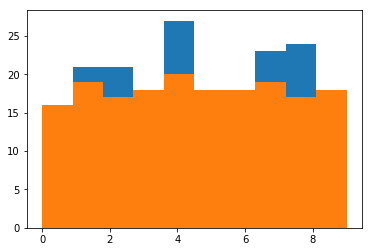

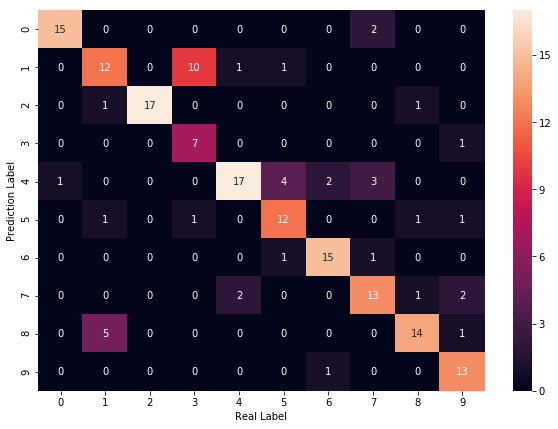

In [33]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [34]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类

In [35]:
## 分别绘制15个分类器的准确率随着训练的变化，有可能ecoc 的还比他们都高哈哈哈

In [37]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
    
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

acc = np.sum(list_P == digits.target[:1617])/1617
print(acc)

0.8435374149659864


In [38]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8405689548546692